## Import necessary libraries and functions

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# tensorflow backend
from os import environ
environ['KERAS_BACKEND'] = 'tensorflow'
# import scientific py
import numpy as np
import pandas as pd
# rdkit stuff
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import PandasTools
# plotting stuff
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import SVG, display
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
# adding path with code to PATH variable
import sys
sys.path.insert(1, './chemical_vae')
# vae stuff
from chemvae.vae_utils import VAEUtils
from chemvae import mol_utils as mu

Using TensorFlow backend.


In [3]:
# creating the variational autoencoder and loading the pretrained model
vae = VAEUtils(directory='./chemical_vae/models/zinc_properties')

Using standarized functions? True


NumExpr defaulting to 4 threads.


Standarization: estimating mu and std values ...done!


In [16]:
print('hi')
#smiles_1 = 'CSCC(=O)NNC(=O)c1c(C)oc(C)c1C'
#smiles_1 = 'CC1(C)CCC(CN2CCN(c3ccc(C(=O)NS(=O)(=O)c4ccc(NCC5CCOCC5)c([N+](=O)[O-])c4)c(Oc4cnc5[nH]ccc5c4)c3)CC2)=C(c2ccc(Cl)cc2)C1'

smiles_1 = 'C1CNP(=O)(OC1)N(CCCl)CCCl'

hi


In [17]:
X_1 = vae.smiles_to_hot(smiles_1,canonize_smiles=False)
smiles_1_latent = vae.encode(X_1)
smiles_1_latent
print('{:20s} : {} with norm {:.3f}'.format('latent representation',smiles_1_latent.shape, np.linalg.norm(smiles_1_latent)))

latent representation : (1, 196) with norm 12.676


In [18]:
LATENT_DIM = 196
z_1 = vae.encode(X_1,LATENT_DIM)
print(z_1.shape)
print(type(z_1))
X_r= vae.decode(z_1)

reconstructed_smiles_1 = vae.hot_to_smiles(X_r,strip=True)[0]
original = Chem.MolFromSmiles(smiles_1)
reconstructued_1 = Chem.MolFromSmiles(reconstructed_smiles_1)
print('{:20s} : {}'.format('Input:',smiles_1))
print('{:20s} : {}'.format('Reconstructued:', reconstructed_smiles_1))

(1, 196)
<class 'numpy.ndarray'>
Input:               : C1CNP(=O)(OC1)N(CCCl)CCCl
Reconstructued:      : N=C([N+](C(C)c1(C)Cl)C(Cl


In [19]:
# Looking for 1k neighbours
stdev = 0.1
decoded_molecules = []
#latent_mols = stdev * np.random.randn(1000, LATENT_DIM) + z_1

#rand_val = stdev * np.random.randn(1, LATENT_DIM);
#print(rand_val.shape)
#print(rand_val)

print('Generating new molecules from latent space..')
i = 1
while i <= 1000:
    rand_val = stdev * np.random.randn(1, LATENT_DIM)
    lm = rand_val + z_1
    temp1 = vae.decode(lm)
    reconstructed_smiles_1 = vae.hot_to_smiles(temp1,strip=True)[0]
    #print(type(reconstructed_smiles_1))
    #print(reconstructed_smiles_1)
    decoded_molecules.append(reconstructed_smiles_1)
    print('Generated Molecule ',i,reconstructed_smiles_1)
    i += 1

print('random 1000 molecule generated')

Generating new molecules from latent space..
Generated Molecule  1 SC(C[N+](C(=S)N(CC(C)C(Cl
Generated Molecule  2 SC(C[N+](C(=S(NC(C#C)C(Cl
Generated Molecule  3 N=C([N+](C(=SCN(CCl)C)Cl
Generated Molecule  4 C#C([n+](C(C/)NC(C@l)C(Cl
Generated Molecule  5 SC(C[N+](O-]1)N(C)Cl)C)Cl
Generated Molecule  6 C#C([n+](C(=S)N(CCCl)C)Cl
Generated Molecule  7 SC(C[N+](C(=SCN(C)Cl)C(Cl
Generated Molecule  8 C#C([N+](C(=S)N(C)Cl)C(Cl
Generated Molecule  9 N#C([N+](C(=S)N(C)Cl)C(Cl
Generated Molecule  10 SC(C[N+](C(C)=N(C)Cl)C(Cl
Generated Molecule  11 SC(C[N+](C(C)CN(C)Cl)C(Cl
Generated Molecule  12 SC(C[N+]([OC)=N(C)Cl)C)Cl
Generated Molecule  13 C#C([N+](C(=S)N(CCl)=C(Cl
Generated Molecule  14 SC(C[n+](C(C)(N(CC)S)C(Cl
Generated Molecule  15 S=C([N+](/O)S)N(CC)C)C(Cl
Generated Molecule  16 S=C([N+](COC)=NC(C@I)C(F
Generated Molecule  17 OC(C[N+](C(C)=N(CClC)C(Cl
Generated Molecule  18 SC1([n+](C(C)=N(C(Cl)C(Cl
Generated Molecule  19 N=C([N+](N(C)=N(C)Cl)C(Cl
Generated Molecule  20 C#C([N+](C(C

Generated Molecule  167 OC(C[N+](C(=S(N(CC)C)C(Cl
Generated Molecule  168 OC(C[N+](C(C)CNC(ClC)C(Cl
Generated Molecule  169 SC(C[N+](C(C)=N(C)Cl)C(Cl
Generated Molecule  170 /C(C[N+](C(=S(N(C)Cl)C1Cl
Generated Molecule  171 S(C([N+](C(C)=N(C)Cl)C1Cl
Generated Molecule  172 N=C([N+](C(=S)N(C)Cl)CCl
Generated Molecule  173 O=C([N+]1(OC)=N(CC#C)C(Cl
Generated Molecule  174 SC(C[N+](C(=S)N(CC#C)C(Cl
Generated Molecule  175 OC(C[n+](C(=S)N(C)Cl)ClCl
Generated Molecule  176 SC(C[N+](C(=S(N(C)Cl)C)Cl
Generated Molecule  177 SC(C[N+](C(=S)N(C)Cl)C(Cl
Generated Molecule  178 C#C([N+](N(C)=N(CC)C)C1Cl
Generated Molecule  179 C#C([N+](C(=S(N(C)Cl)C1Cl
Generated Molecule  180 SC(C[N+](C(=S(NC(C)C)C)Cl
Generated Molecule  181 C#C([N+](C(C)=N(C)Cl)C1Cl
Generated Molecule  182 C#C([N+]1(OC)(N(CC)S)C(Cl
Generated Molecule  183 S(C([n+]n(OC)=N(C(Cl)C(Cl
Generated Molecule  184 OC(C[N+](C(=S)N(C)Cl)C)Cl
Generated Molecule  185 S=C([N+](C(C)=N(C)Cl)C(Cl
Generated Molecule  186 OC(C[N+](C(=S)N(C)Cl)C(Cl
G

Generated Molecule  332 C#C(C(=O)(OC)=N(CC)C)C(Cl
Generated Molecule  333 SC(C[N+](C(=S)N(CC)C)C(Cl
Generated Molecule  334 C#C([N+](N(=S(N(C)Cl)C1Cl
Generated Molecule  335 S(C([N+]1(OC)=N(C)Cl)C(Cl
Generated Molecule  336 SC(/[N+](/OC)(N(C)Cl)C(Cl
Generated Molecule  337 SC(C[N+](C(=S)N(C@@H]cc1I
Generated Molecule  338 C=C([N+]1(OC)=N(C)Cl)C)Cl
Generated Molecule  339 N=C([N+](N(=SCN(C)Cl)C)Cl
Generated Molecule  340 C=C([N+](C(C)CN(C)Cl)C(Cl
Generated Molecule  341 N=C([N+]1(OC)=N(CC)C)C(Cl
Generated Molecule  342 S=C([N+](NC(S)N(CCl)=C)Cl
Generated Molecule  343 C=C([n+](/C)S(N(CC@H]SCl
Generated Molecule  344 SC(C[N+](\OC)=N(CC@H]SCl
Generated Molecule  345 C#C([N+](C(=S)N(CCl)C)Cl
Generated Molecule  346 N=C([N+](/C(S)NC(C(C)C)Cl
Generated Molecule  347 SC(C[N+]1(OC)=N(C)Cl)C(Cl
Generated Molecule  348 N=C([n+](N(=SCN(C)Cl)C)Cl
Generated Molecule  349 SC(C[N+](\OC)=N(CC)C)C(Cl
Generated Molecule  350 SC(C[N+](C(=S)NC1C(I)C(F
Generated Molecule  351 C#C([n+](C(C)=N(C)Cl)C(Cl
Gene

Generated Molecule  497 S(C([n+](N(=S(N(CC)C)C1Cl
Generated Molecule  498 C#C([N+](C(=S)N(C)Cl)C(Cl
Generated Molecule  499 N=C([N+](C(=S(N(CCl)SC(Cl
Generated Molecule  500 SC(C[N+]1(OC)=N(C1Cl)C)Cl
Generated Molecule  501 N=C([n+](C(=S)N(C)Cl)C(Cl
Generated Molecule  502 C#C([N+](OC(S(N(CC(I)C)Cl
Generated Molecule  503 SC(C[n+](C(C)(N(CC(F)C)Cl
Generated Molecule  504 SC(C[N+](\OC)=N(CC)C)C(Cl
Generated Molecule  505 OC(C[N+](OC@H](C(C@H]1Cl
Generated Molecule  506 SCC([N+]1(OC)=N(CC)S)C(Cl
Generated Molecule  507 SC(F[N+](C(C)=NC(C)S)C)Cl
Generated Molecule  508 SC(C[N+](C(=S)N(C)Cl)C(Cl
Generated Molecule  509 C#C([N+](=OC)=N(CC(C)C(Cl
Generated Molecule  510 SCC([N+]n(OC)=N(C)Cl)ClCl
Generated Molecule  511 C#C([n+](C(=S)N(C)Cl)C(Cl
Generated Molecule  512 N=C([N+]1C(C)=N(C)Cl)CCl
Generated Molecule  513 SC(C[N+](N(=S(NC(C@@H]c1F
Generated Molecule  514 SC(C[N+]1(OC)=N(C)Cl)C(Cl
Generated Molecule  515 SC(C[N+](C(=S(N(CCl)=C(Cl
Generated Molecule  516 SCC([N+](C(C)=N(C)Cl)C(Cl
Ge

Generated Molecule  662 SC(C[N+](C(C)(N(C)Cl)C(Cl
Generated Molecule  663 N=C([N+](N(=S)N(CC)C)C(Cl
Generated Molecule  664 C#C([N+](C(=S)N(C)Cl)C(Cl
Generated Molecule  665 SC(C[N+](C(=S)N(CC(C)C(Cl
Generated Molecule  666 N=C([N+](/C@]1N(CC)C)C(Cl
Generated Molecule  667 C=C([N+](N(C)=N(CC)C)CCl
Generated Molecule  668 SC(C[N+]1(OC)CNC(C@l)C(Cl
Generated Molecule  669 OC1C[n+](C(=S)N(CC(C)CCl
Generated Molecule  670 C=C([N+](C(=S)N(C)Cl)C/Cl
Generated Molecule  671 N=C([N+](C(=S)N(C)Cl)C)Cl
Generated Molecule  672 SC(C[N+](C(C)=NCCC#C)C(Cl
Generated Molecule  673 SC(C[N+]1(OC)=N(CC@])C(Cl
Generated Molecule  674 SC(C[N+](C(=S(N(CC(C)C(Cl
Generated Molecule  675 C#C([n+](C(C)cn(CCl)C)Cl
Generated Molecule  676 SC(C[N+]n(OC)=N(C)Cl)CCl
Generated Molecule  677 SCC([N+](C(/S(NC(C)C)C(Cl
Generated Molecule  678 SC(C[N+](C(=S)N(CC)C)C(Cl
Generated Molecule  679 SC(C[N+](C(=S(N(CC)S)C(Cl
Generated Molecule  680 C#C([N+](C(C)=N(C)Cl)C(Cl
Generated Molecule  681 C#C([N+](COC)=N(CC)C)C1Cl
Gene

Generated Molecule  827 SC(C[N+](N(C)CN(C)Cl)C1Cl
Generated Molecule  828 C=C([n+](C(C)CN(C)Cl)C(Cl
Generated Molecule  829 S=C([N+](O/C)=N(C)Cl)C1Cl
Generated Molecule  830 C#C([n+]([OC)=N(CClC)C(Cl
Generated Molecule  831 C#C([N+](C(C)CN(CC)C)C)Cl
Generated Molecule  832 C#C([N+](C(C)=N(C)Cl)C)Cl
Generated Molecule  833 SC(C[N+](/C=S(N(CC#C)C(Cl
Generated Molecule  834 OC(C[n+]([/C)=NC(C@H]C)Cl
Generated Molecule  835 SC(C[N+]1(/C)=NC(C)S)C(Cl
Generated Molecule  836 C=C([n+](C(=S)N(CCl)CC(Cl
Generated Molecule  837 SCC([N+]1(OC)=N(C)Cl)C(Cl
Generated Molecule  838 SC(C[N+](C(C)=N(C)Cl)C1Cl
Generated Molecule  839 C#C([N+](C(=S)N(CC)S)C)Cl
Generated Molecule  840 S=C([N+](C(C)=N(CCl)C)Cl
Generated Molecule  841 SC(C[N+](C(C)=N(C)Cl)C(Cl
Generated Molecule  842 OC(C[N+](C(C)=N(CC@l)C)Cl
Generated Molecule  843 C#C([N+](C(C)=N(C)Cl)C(Cl
Generated Molecule  844 SC(C[nH](C(=S)N(C)Cl)C(Cl
Generated Molecule  845 OC(C[N+](C(C)=N(C)Cl)C)Cl
Generated Molecule  846 S=S/C(=O)(OC)CN(C)Cl)C)Cl
G

Generated Molecule  992 SCC([N+](C(C)=N(C)Cl)C(Cl
Generated Molecule  993 SC(C[N+](C(=SCN(CC(C)CCl
Generated Molecule  994 SCC([N+](C(=S(NC(C(I)C(Cl
Generated Molecule  995 SC(C[N+]1(OC)(N(C)Cl)C(Cl
Generated Molecule  996 C#C([N+](C/C)=N(C)Cl)C(Cl
Generated Molecule  997 SC(C[N+](C(C)=N(CCl)SC)Cl
Generated Molecule  998 SC(C[NH]n(OC)=N(CC)C)C)/S
Generated Molecule  999 SC(C[n+]([nH])N(C)Cl)C(Cl
Generated Molecule  1000 SC(C[N+](OC@]1N(CC)C)C(Cl
random 1000 molecule generated


In [20]:
from rdkit import Chem
from rdkit import RDLogger
from rdkit.Chem import Draw

# remove warnings and errors from notebook (lots of them due non valid molecule generation)
lg = RDLogger.logger()
lg.setLevel(RDLogger.CRITICAL)

working_mols = []
for smiles in decoded_molecules:
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            working_mols.append(mol)
    except:
        continue

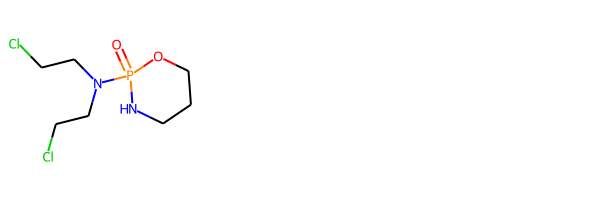

In [21]:
Draw.MolsToGridImage([original])

[<rdkit.Chem.rdchem.Mol object at 0x7fe8c21149e0>, <rdkit.Chem.rdchem.Mol object at 0x7fe8c2114a80>, <rdkit.Chem.rdchem.Mol object at 0x7fe8c2114990>, <rdkit.Chem.rdchem.Mol object at 0x7fe8c2114b20>, <rdkit.Chem.rdchem.Mol object at 0x7fe8c2114b70>, <rdkit.Chem.rdchem.Mol object at 0x7fe8c2114bc0>, <rdkit.Chem.rdchem.Mol object at 0x7fe8c2114c10>, <rdkit.Chem.rdchem.Mol object at 0x7fe8c2114c60>, <rdkit.Chem.rdchem.Mol object at 0x7fe8c2114cb0>, <rdkit.Chem.rdchem.Mol object at 0x7fe8c2114d00>, <rdkit.Chem.rdchem.Mol object at 0x7fe8c2114d50>, <rdkit.Chem.rdchem.Mol object at 0x7fe8c2114da0>, <rdkit.Chem.rdchem.Mol object at 0x7fe8c2114df0>, <rdkit.Chem.rdchem.Mol object at 0x7fe8c2114e40>, <rdkit.Chem.rdchem.Mol object at 0x7fe8c2114e90>, <rdkit.Chem.rdchem.Mol object at 0x7fe8c2114ee0>, <rdkit.Chem.rdchem.Mol object at 0x7fe8c2114f30>, <rdkit.Chem.rdchem.Mol object at 0x7fe8c2114f80>, <rdkit.Chem.rdchem.Mol object at 0x7fe8c2397030>, <rdkit.Chem.rdchem.Mol object at 0x7fe8e58c0bc0>,

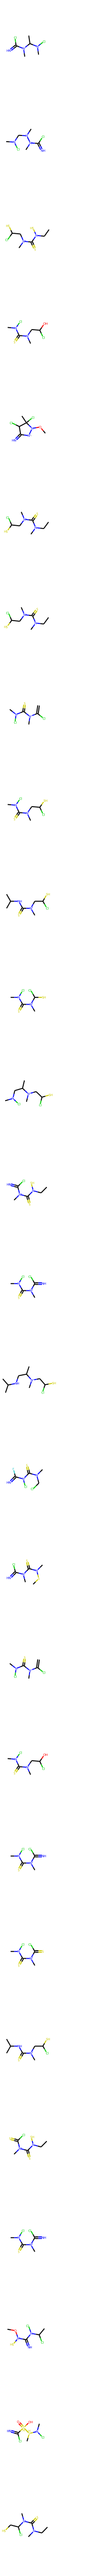

In [24]:
print(working_mols)
Draw.MolsToGridImage([mol for mol in working_mols], molsPerRow=1)